# Different Optimizers and Learning Rate Scheduling

## Setup

In [ ]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("CIFAR-100-DNN-Optimization"):
    raise ValueError("Please change working directory to 'path/CIFAR-100-DNN-Optimization' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/CIFAR-100-DNN-Optimization


In [ ]:
!pip install -r requirements.txt

In [ ]:
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Input, BatchNormalization, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau

## Load Data

In [ ]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

data_pre_path = './data/CIFAR-100/'

In [ ]:
data_train_path = data_pre_path + 'train'
data_test_path = data_pre_path + 'test'
data_train_dict = unpickle(data_train_path)
data_test_dict = unpickle(data_test_path)
data_train = data_train_dict[b'data']
y_train_valid = np.array(data_train_dict[b'fine_labels'])
data_test = data_test_dict[b'data']
y_test = np.array(data_test_dict[b'fine_labels'])

In [ ]:
X_train_valid = data_train.reshape(-1, 3, 32, 32).transpose(0,2,3,1) / 255
X_test = data_test.reshape(-1, 3, 32, 32).transpose(0,2,3,1) / 255

## Data splitting

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=5000/50000, stratify=y_train_valid, random_state=42)

## Nesterov Accelerated Gradient

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = Sequential()
model.add(Input(shape=input_shape))
model.add(Flatten())

for _ in range(10):
    model.add(Dense(400, activation="swish", kernel_initializer="he_normal"))
    
model.add(Dense(100, activation="softmax"))

optimizer = tf.keras.optimizers.SGD(nesterov=True)

model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [ ]:
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=30, batch_size=128, callbacks=[early_stopping])

Epoch 1/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.0122 - loss: 4.6039 - val_accuracy: 0.0122 - val_loss: 4.5803
Epoch 2/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.0125 - loss: 4.5604 - val_accuracy: 0.0256 - val_loss: 4.5129
Epoch 3/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.0315 - loss: 4.4729 - val_accuracy: 0.0578 - val_loss: 4.3227
Epoch 4/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.0709 - loss: 4.2001 - val_accuracy: 0.0930 - val_loss: 4.0217
Epoch 5/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.1044 - loss: 3.9504 - val_accuracy: 0.1200 - val_loss: 3.8486
Epoch 6/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.1255 - loss: 3.7937 - val_accuracy: 0.1360 - val_loss: 3.7448
Epoch 7/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.1428 - loss: 3.6823 - val_accuracy: 0.1464 - val_loss: 3.6713
Epoch 8/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.1557 - loss: 3.5941 - val_accu

In [ ]:
def plot_history(history):
    hist_df = pd.DataFrame(history.history)
    hist_df.plot(style=["g+--", "ro--", "b*-", "k^-"], alpha=0.8, xlabel="epoch")
    plt.show()

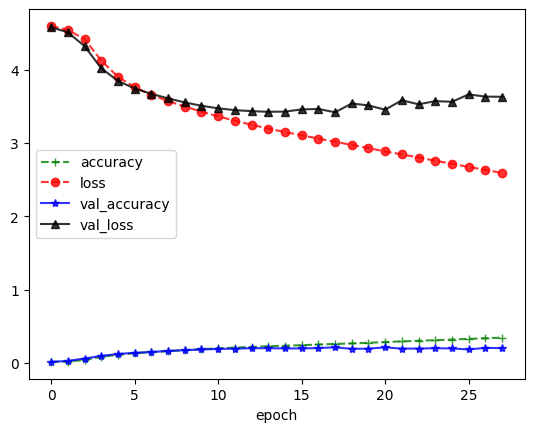

In [ ]:
plot_history(history)

## Adam

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = Sequential()
model.add(Input(shape=input_shape))
model.add(Flatten())

for _ in range(10):
    model.add(Dense(400, activation="swish", kernel_initializer="he_normal"))
    
model.add(Dense(100, activation="softmax"))

optimizer = tf.keras.optimizers.Adam()

model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [ ]:
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=30, batch_size=128, callbacks=[early_stopping])

Epoch 1/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.0447 - loss: 4.3143 - val_accuracy: 0.1010 - val_loss: 3.8521
Epoch 2/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.1146 - loss: 3.7776 - val_accuracy: 0.1424 - val_loss: 3.6608
Epoch 3/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.1445 - loss: 3.5813 - val_accuracy: 0.1532 - val_loss: 3.5949
Epoch 4/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.1651 - loss: 3.4695 - val_accuracy: 0.1628 - val_loss: 3.5447
Epoch 5/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.1770 - loss: 3.3914 - val_accuracy: 0.1708 - val_loss: 3.5362
Epoch 6/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.1899 - loss: 3.3081 - val_accuracy: 0.1592 - val_loss: 3.6214
Epoch 7/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.2000 - loss: 3.2616 - val_accuracy: 0.1618 - val_loss: 3.5922
Epoch 8/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.2118 - loss: 3.2077 - v

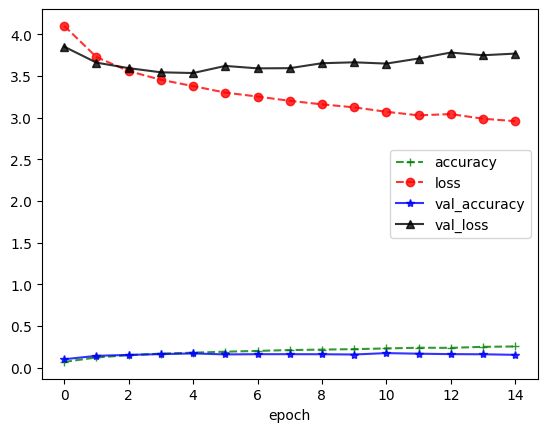

In [ ]:
plot_history(history)

In [ ]:
model.evaluate(X_valid, y_valid)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1690 - loss: 3.5400


[3.5361528396606445, 0.17080000042915344]

## Nadam

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = Sequential()
model.add(Input(shape=input_shape))
model.add(Flatten())

for _ in range(10):
    model.add(Dense(400, activation="swish", kernel_initializer="he_normal"))
    
model.add(Dense(100, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam()

model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=30, batch_size=128, callbacks=[early_stopping])

Epoch 1/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - accuracy: 0.0395 - loss: 4.3781 - val_accuracy: 0.1102 - val_loss: 3.8022
Epoch 2/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.1237 - loss: 3.7291 - val_accuracy: 0.1604 - val_loss: 3.5623
Epoch 3/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.1624 - loss: 3.5054 - val_accuracy: 0.1746 - val_loss: 3.4888
Epoch 4/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.1872 - loss: 3.3628 - val_accuracy: 0.1772 - val_loss: 3.5030
Epoch 5/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.2058 - loss: 3.2517 - val_accuracy: 0.1784 - val_loss: 3.4886
Epoch 6/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.2203 - loss: 3.1480 - val_accuracy: 0.1864 - val_loss: 3.5161
Epoch 7/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - accuracy: 0.2392 - loss: 3.0578 - val_accuracy: 0.1746 - val_loss: 3.6355
Epoch 8/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.2513 - loss: 2.9739 - 

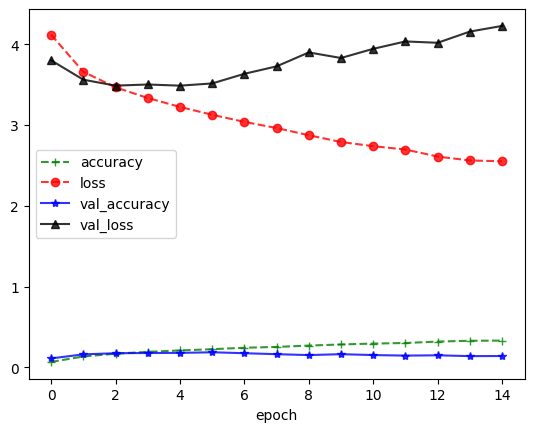

In [ ]:
plot_history(history)

Model starts overfitting quickly after a few epochs

## AdamW

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = Sequential()
model.add(Input(shape=input_shape))
model.add(Flatten())

for _ in range(10):
    model.add(Dense(400, activation="swish", kernel_initializer="he_normal"))
    
model.add(Dense(100, activation="softmax"))

optimizer = tf.keras.optimizers.AdamW(weight_decay=0.01)

model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=30, callbacks=[early_stopping], batch_size=128)

Epoch 1/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.0414 - loss: 4.3542 - val_accuracy: 0.1024 - val_loss: 3.8816
Epoch 2/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.1132 - loss: 3.7876 - val_accuracy: 0.1272 - val_loss: 3.6928
Epoch 3/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.1458 - loss: 3.5968 - val_accuracy: 0.1484 - val_loss: 3.5962
Epoch 4/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.1619 - loss: 3.4845 - val_accuracy: 0.1604 - val_loss: 3.5418
Epoch 5/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.1787 - loss: 3.3908 - val_accuracy: 0.1574 - val_loss: 3.5320
Epoch 6/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.1924 - loss: 3.3218 - val_accuracy: 0.1590 - val_loss: 3.5477
Epoch 7/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.1991 - loss: 3.2695 - val_accuracy: 0.1544 - val_loss: 3.6097
Epoch 8/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - accuracy: 0.2103 - loss: 3.2157 - 

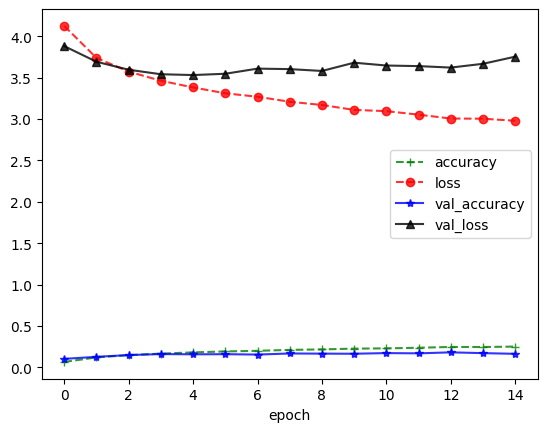

In [ ]:
plot_history(history)

## Learning Rate Scheduling

In [ ]:
def build_model():
    tf.keras.backend.clear_session()
    tf.random.set_seed(42)

    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Flatten())

    for _ in range(10):
        model.add(Dense(400, activation="swish", kernel_initializer="he_normal"))
        
    model.add(Dense(100, activation="softmax"))

    optimizer = tf.keras.optimizers.SGD(nesterov=True, learning_rate=0.05)

    model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    return model
    

### Power scheduling

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = Sequential()
model.add(Input(shape=input_shape))
model.add(Flatten())

for _ in range(10):
    model.add(Dense(400, activation="swish", kernel_initializer="he_normal"))
    
model.add(Dense(100, activation="softmax"))

optimizer = tf.keras.optimizers.SGD(nesterov=True, learning_rate=0.05, decay=1e-4)

model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=30, batch_size=128, callbacks=[early_stopping])

Epoch 1/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.0226 - loss: 4.5338 - val_accuracy: 0.0592 - val_loss: 4.1999
Epoch 2/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.0786 - loss: 4.0779 - val_accuracy: 0.1176 - val_loss: 3.8146
Epoch 3/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.1175 - loss: 3.8125 - val_accuracy: 0.1280 - val_loss: 3.7263
Epoch 4/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.1419 - loss: 3.6516 - val_accuracy: 0.1458 - val_loss: 3.6583
Epoch 5/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.1628 - loss: 3.5199 - val_accuracy: 0.1608 - val_loss: 3.5703
Epoch 6/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.1798 - loss: 3.4176 - val_accuracy: 0.1780 - val_loss: 3.4885
Epoch 7/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.1935 - loss: 3.3186 - val_accuracy: 0.1720 - val_loss: 3.5777
Epoch 8/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.2063 - loss: 3.2448 - val_a

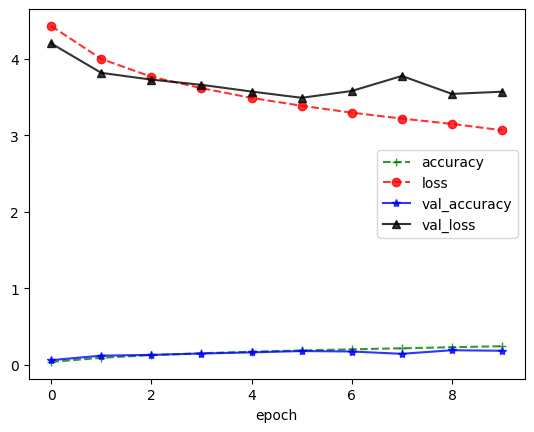

In [ ]:
plot_history(history)

### Exponential Scheduling

In [ ]:
def exponential_schedule(epoch):
    return 0.1 * 0.1 ** (epoch / 20)

In [ ]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_schedule)

In [ ]:
model = build_model()

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=30, callbacks=[early_stopping, lr_scheduler], batch_size=128)

Epoch 1/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.0196 - loss: 4.5561 - val_accuracy: 0.0452 - val_loss: 4.2662 - learning_rate: 0.1000
Epoch 2/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.0712 - loss: 4.0883 - val_accuracy: 0.1012 - val_loss: 3.8978 - learning_rate: 0.0891
Epoch 3/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.1084 - loss: 3.8282 - val_accuracy: 0.1308 - val_loss: 3.7243 - learning_rate: 0.0794
Epoch 4/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.1395 - loss: 3.6406 - val_accuracy: 0.1534 - val_loss: 3.6350 - learning_rate: 0.0708
Epoch 5/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.1628 - loss: 3.4950 - val_accuracy: 0.1684 - val_loss: 3.5431 - learning_rate: 0.0631
Epoch 6/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.1856 - loss: 3.3717 - val_accuracy: 0.1798 - val_loss: 3.4885 - learning_rate: 0.0562
Epoch 7/30
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.2055 - loss: 3.

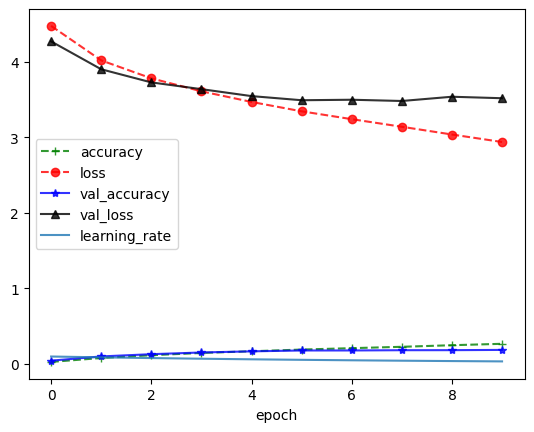

In [ ]:
plot_history(history)